# BA 875 Operations and Supply Chain Analytics
   Homework Assignment 5



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
demand_data = 'https://raw.githubusercontent.com/nahariaprateek/SupplyChain-Operations-Data-Analytics/main/datasets_course/demand_data.csv'
refurb_data = 'https://raw.githubusercontent.com/nahariaprateek/SupplyChain-Operations-Data-Analytics/main/datasets_course/refurb_data.csv'
df_demand = pd.read_csv(demand_data)
df_refurb = pd.read_csv(refurb_data)

## Part I: Pricing Analysis 



*   Optimal pricing for weekend vs. weekday
*   Dataset: demand_data





In [ ]:
demand = df_demand.copy()
demand.head()

,price,demand,weekend
0,4.0,7,1
1,3.5,7,0
2,5.0,5,0
3,6.0,4,0
4,6.5,4,0


• Estimate the demand d(p) by regressing on price and weekend. Interpret the regressionresults. Provide an interpretation in your own words!

• Calculate the optimal weekday price p* (when w = 0) and its corresponding profito Clearly state your findings, do not simply show output of running codeo Determine whether the optimal weekday price is within the credible range andprovide response in your own words!

• Calculate the optimal weekend price p* (when w = 1) and its corresponding profito Clearly state your findings, do not simply show output of running codeo Determine whether the optimal weekend price is within the credible range andprovide response in your own words

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from scipy.optimize import minimize_scalar

ols_model = smf.ols(formula='demand ~ price + weekend', data=df_demand).fit()
print(ols_model.summary())
ols_model.params

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 01 May 2023   Prob (F-statistic):           4.07e-14
Time:                        15:16:32   Log-Likelihood:                -27.363
No. Observations:                  32   AIC:                             60.73
Df Residuals:                      29   BIC:                             65.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9293      0.312     31.808      0.0

Intercept    9.929305
price       -0.877246
weekend      0.419832
dtype: float64

### Weekday

In [ ]:
# Define the profit function for weekdays
profit = lambda w: -(ols_model.params['Intercept'] + ols_model.params['price'] * w + ols_model.params['weekend'] * 0) * (w - 4)
# Optimize the profit function for weekdays (w = 0)
weekday_opt = minimize_scalar(profit, method='brent')
print(weekday_opt.x)
print(weekday_opt)

7.659360769101043
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -11.747134712211036
       x: 7.659360769101043
     nit: 4
    nfev: 9


In [ ]:
weekday_opt = minimize_scalar(profit, method='brent').x
print("Optimal maximum Profit is: $", round(-profit(weekday_opt), 2))

Optimal maximum Profit is: $ 11.75


The Optimal Price is $7.65

In [ ]:
# Checking if the optimal prices are within the credible range
min_price = df_demand.price.min()
max_price = df_demand.price.max()
weekday_price_credible = min_price <= weekday_opt <= max_price
print("min_price", min_price)
print("max_price", max_price)
print("Optimal weekday price:", weekday_opt)
print("Optimal weekday profit:", -weekday_opt)
print("Weekday price within the credible range?", weekday_price_credible)

min_price 1.5
max_price 7.5
Optimal weekday price: 7.659360769101043
Optimal weekday profit: -7.659360769101043
Weekday price within the credible range? False



Give that the min_price is 1.5 & max_price is 7.5.

We can see that - Optimal Weekday price is 7.65 which is greater than 7.5. Hence not in the credible range. 



### Weekend

In [ ]:
profit = lambda w: -(ols_model.params['Intercept'] + ols_model.params['price'] * w + ols_model.params['weekend'] * 1) * (w - 4)

In [ ]:
# Optimize the profit function for weekends (w = 1)
weekend_opt = minimize_scalar(profit, method='brent')
print(weekend_opt.x)
print(weekend_opt)

7.898650699949416
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -13.3336836194211
       x: 7.898650699949416
     nit: 4
    nfev: 9


In [ ]:
weekend_opt = minimize_scalar(profit, method='brent').x
print("Optimal maximum Profit is: $", round(-profit(weekend_opt), 2))

Optimal maximum Profit is: $ 13.33


In [ ]:
# Checking if the optimal prices are within the credible range
min_price = df_demand.price.min()
max_price = df_demand.price.max()
weekend_price_credible = min_price <= weekend_opt <= max_price
print("min_price", min_price)
print("max_price", max_price)
print("Optimal weekend price:", weekend_opt)
print("Optimal weekend profit:", -weekend_opt)
print("Weekend price within the credible range?", weekend_price_credible)

min_price 1.5
max_price 7.5
Optimal weekend price: 7.898650699949416
Optimal weekend profit: -7.898650699949416
Weekend price within the credible range? False


Here also the optimal weekend price value is $ 7.89 and is out of credible range as defined in the above result. It is possible that model assumptions are incorrect.

##Part II: Pricing Analysis
New vs Refurbished Product

Dataset: refurb_data

In [ ]:
df_refurb.head()

,dates,new_price,refurb_price,choice
0,2014-06-01,400,264.0,refurb
1,2014-06-01,400,264.0,refurb
2,2014-06-01,400,264.0,refurb
3,2014-06-01,400,264.0,new
4,2014-06-01,400,264.0,new




*   Calculate the optimal refurbished price and profit when the new price = 300

*   Calculate the optimal refurbished price and profit when the new price = 350

*    Calculate the optimal refurbished price and profit when the new price = 400
*    Comment on the differences in the optimal refurbished price when offering the three different new prices. Next, comment on the differences in the optimal profit whenoffering the three different new prices.


In [ ]:
df_refurb['dates'] = pd.to_datetime(df_refurb['dates'])
df_refurb['new_price'] = df_refurb['new_price'].astype("float")
df_refurb['refurb_price'] = df_refurb['refurb_price'].astype("float")
df_refurb.info()
df_refurb.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dates         500 non-null    datetime64[ns]
 1   new_price     500 non-null    float64       
 2   refurb_price  500 non-null    float64       
 3   choice        500 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 15.8+ KB


,dates,new_price,refurb_price,choice
0,2014-06-01,400.0,264.0,refurb
1,2014-06-01,400.0,264.0,refurb
2,2014-06-01,400.0,264.0,refurb
3,2014-06-01,400.0,264.0,new
4,2014-06-01,400.0,264.0,new
5,2014-06-01,400.0,264.0,refurb
6,2014-06-01,400.0,264.0,refurb
7,2014-06-01,400.0,264.0,new
8,2014-06-01,400.0,264.0,new
9,2014-06-01,400.0,264.0,refurb


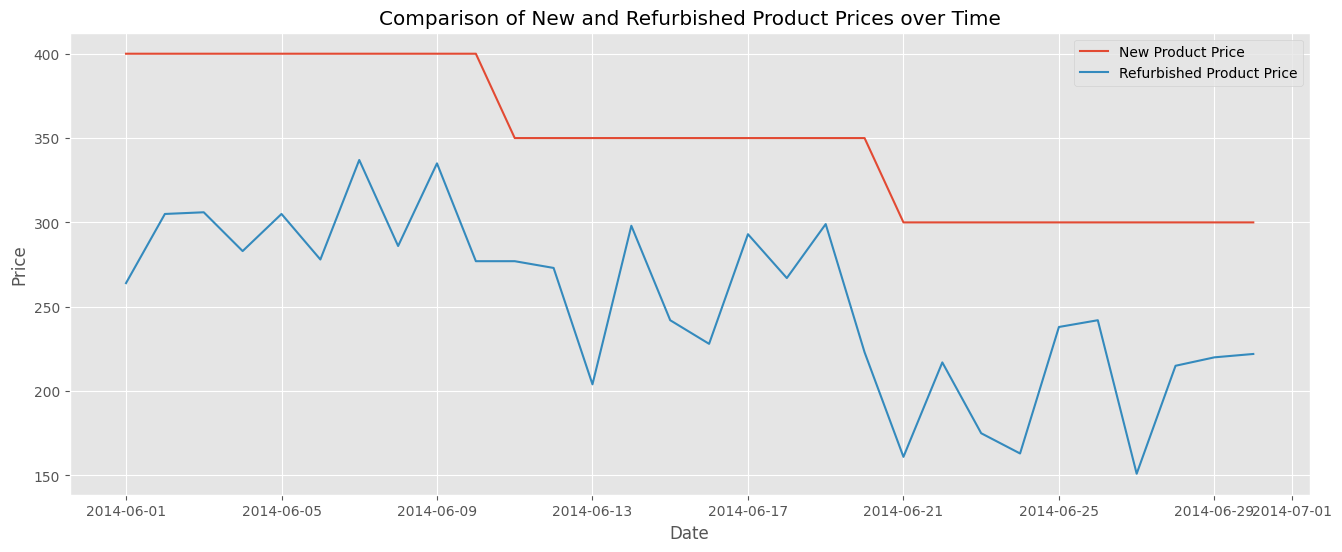

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.style.use('ggplot')
plt.plot(df_refurb.iloc[:,:-1].drop_duplicates().dates,
         df_refurb.iloc[:,:-1].drop_duplicates().new_price, label='New Product Price')
plt.plot(df_refurb.iloc[:,:-1].drop_duplicates().dates,
         df_refurb.iloc[:,:-1].drop_duplicates().refurb_price, label='Refurbished Product Price')
plt.legend(loc='best')
plt.title('Comparison of New and Refurbished Product Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.optimize import minimize_scalar

# Calculate daily demand for refurbished products
df_refurb['refurb_demand'] = np.where(df_refurb['choice'] == 'refurb', 1, 0)
daily_demand = df_refurb.groupby(['dates', 'new_price', 'refurb_price']).refurb_demand.sum().reset_index()

demand_fit = smf.ols(formula='refurb_demand ~ refurb_price + new_price', data=daily_demand).fit()
print(demand_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          refurb_demand   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     7.601
Date:                Mon, 01 May 2023   Prob (F-statistic):            0.00241
Time:                        05:04:38   Log-Likelihood:                -60.852
No. Observations:                  30   AIC:                             127.7
Df Residuals:                      27   BIC:                             131.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7019      3.224     -0.218   

In [ ]:
demand_fit.params

Intercept      -0.701876
refurb_price   -0.044835
new_price       0.050579
dtype: float64

In [ ]:
def profit(refurb_price, new_price, c=150):
    demand = demand_fit.params[0] + demand_fit.params[1] * refurb_price + demand_fit.params[2] * new_price
    return -1 * demand * (refurb_price - c)

In [ ]:
new_prices = [300, 350, 400]
results = []

for new_price in new_prices:
    bounds = (150, new_price - 1)
    optimal_refurb_price = minimize_scalar(profit, args=(new_price), bounds=bounds, method='bounded')
    results.append((new_price, optimal_refurb_price.x, -1 * optimal_refurb_price.fun))

In [ ]:
for r in results:
    print(f"Optimal refurbished price for new price {r[0]}: {r[1]:.2f}")
    print(f"Optimal max profit for new price {r[0]}: {r[2]:.2f}")
    print()

Optimal refurbished price for new price 300: 236.39
Optimal max profit for new price 300: 334.63

Optimal refurbished price for new price 350: 264.60
Optimal max profit for new price 350: 588.77

Optimal refurbished price for new price 400: 292.80
Optimal max profit for new price 400: 914.24



Based on the above observations:

For a new price of 300:
Optimal refurbished price: 236.39
Optimal max profit: 334.63

For a new price of 350:
Optimal refurbished price: 264.60
Optimal max profit: 588.77

For a new price of 400:
Optimal refurbished price: 292.80
Optimal max profit: 914.24


1.   We can see that, as the new price increases optimal refurbished price also increases. 

2.   Suggesting us that consumers are more likely to buy refurbished product having higher price.

From the sellers point of view when, there is increase in new price - they can also increase the price of refurbished product.

## Part III: Pricing Analysis

Question: Two-Segment Pricing

Dataset: [none needed]

Think back to the exercise (and corresponding slides) on "Segmentation", where we wereprovided with a Linear Price-response Curve d(p) = 10000-800p. There is a uniform WTPdistribution with 10,000 consumers equally distributed between 0 and 12.5.

### No Segmentation

In [ ]:
from scipy.optimize import minimize_scalar
cost = 5
prof = lambda p: -1 * (p - cost) * (10000 - 800 * p)
# Optimal price for no segmentation
result_no_segmentation = minimize_scalar(prof, method='brent')
optimal_price_no_segmentation = result_no_segmentation.x
max_profit_no_segmentation = -result_no_segmentation.fun

print(f"Optimal price (no segmentation): ${optimal_price_no_segmentation:.2f}")
print(f"Maximum profit (no segmentation): ${max_profit_no_segmentation:.2f}")

Optimal price (no segmentation): $8.75
Maximum profit (no segmentation): $11250.00


No Segmentation:

The optimal price to charge when not segmenting the market is  $8.75.

The maximum profit that can be achieved in this scenario is  $11,250.

### Segment 1 

Now, let's find the optimal prices for segment 1 and segment 2, assuming we can price differently for customers with WTP above and below $7.

Segment 1: WTP ≤ $7

In [ ]:
c = 5
result_segment_1 = minimize_scalar(lambda p: -((int(7/12.5 * 10000)) - 800 * p) * (p - c) if p < 7 else 0 * (p - c), method='brent')
optimal_price_segment_1 = result_segment_1.x
max_profit_segment_1 = -result_segment_1.fun

In [ ]:
print(f"Optimal price (segment 1): ${optimal_price_segment_1:.2f}")
print(f"Max profit (segment 1): ${max_profit_segment_1:.2f}")

Optimal price (segment 1): $6.00
Max profit (segment 1): $800.00


Segment 1  (WTP  ≤  $7):

The optimal price to charge for customers with a willingness to pay (WTP) <= 7 is   $6.

The maximum profit that can be achieved from this segment is $800.


### Segment 2 
Segment 2: WTP > $7

In [ ]:
c = 5
res_segment_2 = minimize_scalar(lambda p: -(10000 - 800 * p) * (p - c) if p > 7 else -(10000 - (int(7/12.5 * 10000))) * (p - c), method='brent')
optimal_price_segment_2 = res_segment_2.x
max_profit_segment_2 = -res_segment_2.fun

In [ ]:
print(f"Optimal price (segment 2): ${optimal_price_segment_2:.2f}")
print(f"Max profit (segment 2): ${max_profit_segment_2:.2f}")

Optimal price (segment 2): $8.75
Max profit (segment 2): $11250.00


Segment 2 (WTP > $7):

The optimal price to charge for customers with a willingness to pay (WTP) > $7  is $8.75.

The maximum profit that can be achieved from this segment is $11,250.

### Combined Profit 
Seg 1 & 2

In [ ]:
combined_profit = max_profit_segment_1 + max_profit_segment_2
print(f"Combined profit (segment 1 and 2): ${combined_profit:.2f}")

Combined profit (segment 1 and 2): $12050.00


The combined profit from both segments when using segmented pricing is $12,050.

### Profit Difference: 
Between Combined Profit & Profit with no Segmentation

In [ ]:
profit_difference = combined_profit - max_profit_no_segmentation
print(f"Profit difference Between [(Seg1 + Seg2) - No Segment]): ${profit_difference:.2f}")

Profit difference Between [(Seg1 + Seg2) - No Segment]): $800.00


Based on the above results.

We can say that, by segmenting the market and offering different prices for every segment.

In the case given above, we can see that an additional profit of $800 compared to the strategy having no segmention.

Therefore we can say that, the company has potential to gain higher profits if we approach for segmentation strategy compared to the strategy having single price.